#### Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Adelia Kurnia Saputri
- **Email:** ucingnd@gmail.com
- **ID Dicoding:** adelia_ks

## Menentukan Pertanyaan Bisnis

- Bagaimana Pengaruh Cuaca (Weathersit, Temp, Humidity, dan Windspeed) Terhadap Jumlah Penyewaan Sepeda?
- Kapan Periode Waktu Puncak Penggunaan Sepeda Berdasarkan Musim (Season) dan Hari Kerja (Working Day)?
- Apakah Ada Perbedaan Penggunaan Sepeda Berdasarkan Musim (Season) dan Jam dalam Sehari (Hour)?
- Bagaimana Pengaruh Hari Libur (Holiday) dan Hari Kerja (Workingday) Terhadap Jumlah Pengguna Casual dan Registered?
- Bagaimana Kombinasi dari Cuaca Buruk (Weathersit) dan Waktu Tertentu dalam Sehari (Hour) Mempengaruhi Penurunan Penggunaan Sepeda?

## Import Semua Packages/Library yang Digunakan

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Data Wrangling

### Gathering Data

- #### Memuat tabel day (df_day)

In [147]:
df_day = pd.read_csv('day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- #### Memuat tabel hour (df_hour)

In [148]:
df_hour = pd.read_csv('hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- df_day berisi data harian dengan kolom seperti season, yr, mnth, holiday, dan cnt (jumlah total sewa).
- df_hour berisi data per jam dengan tambahan kolom hr yang menunjukkan jam dalam sehari.
- Kedua dataset memiliki kolom weathersit, temp, atemp, hum, dan windspeed yang dapat dianalisis untuk melihat pengaruh cuaca terhadap sewa sepeda.
- df_day mengkategorikan data berdasarkan hari, sedangkan df_hour memberikan detail jam, memungkinkan analisis temporal yang lebih granular.
- Terdapat kolom casual dan registered yang memisahkan jumlah pengguna sewa sepeda, membantu dalam analisis perilaku pengguna.

### Assessing Data

- #### Menilai Data df_day

In [40]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [41]:
# missing value
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [42]:
# dulicated data
print("Jumlah duplikasi: ", df_day.duplicated().sum())

Jumlah duplikasi:  0


In [43]:
# memeriksa parameter statistik
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [44]:
# memeriksa invalid value
invalid_values = df_day[
    (df_day['season'] < 1) | (df_day['season'] > 4) |
    (df_day['yr'] < 0) | (df_day['yr'] > 1) |
    (df_day['mnth'] < 1) | (df_day['mnth'] > 12) |
    (df_day['weekday'] < 0) | (df_day['weekday'] > 6)
]
print("Invalid Values:\n", invalid_values)

Invalid Values:
 Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [45]:
# memeriksa inaccurate value
inaccurate_values = df_day[
    (df_day['temp'] < 0) | (df_day['temp'] > 1) |
    (df_day['hum'] < 0) | (df_day['hum'] > 1) |
    (df_day['windspeed'] < 0)
]
print("Inaccurate Values:\n", inaccurate_values)


Inaccurate Values:
 Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [46]:
# memeriksa inconsistent value
inconsistent_values = df_day[
    (df_day['workingday'] == 1) & (df_day['weekday'] == 0)
]
print("Inconsistent Values:\n", inconsistent_values)


Inconsistent Values:
 Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [47]:
# menghitung outlier menggunakan IQR
Q1 = df_day['cnt'].quantile(0.25)
Q3 = df_day['cnt'].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = (df_day['cnt'] < (Q1 - 1.5 * IQR)) | (df_day['cnt'] > (Q3 + 1.5 * IQR))
outliers = df_day[outlier_condition]
print("Outliers:\n", outliers)

Outliers:
 Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []




- #### Menilai Data df_hour

In [48]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [49]:
# missing value
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [50]:
# dulicated data
print("Jumlah duplikasi: ", df_hour.duplicated().sum())

Jumlah duplikasi:  0


In [51]:
# memeriksa parameter statistik
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [52]:
# memeriksa invalid value
invalid_values_hour = df_hour[
    (df_hour['season'] < 1) | (df_hour['season'] > 4) |
    (df_hour['yr'] < 0) | (df_hour['yr'] > 1) |
    (df_hour['mnth'] < 1) | (df_hour['mnth'] > 12) |
    (df_hour['hr'] < 0) | (df_hour['hr'] > 23) |
    (df_hour['weekday'] < 0) | (df_hour['weekday'] > 6)
]
print("Invalid Values in df_hour:\n", invalid_values_hour)

Invalid Values in df_hour:
 Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [53]:
# memeriksa inaccurate value
inaccurate_values_hour = df_hour[
    (df_hour['temp'] < 0) | (df_hour['temp'] > 1) |
    (df_hour['hum'] < 0) | (df_hour['hum'] > 1) |
    (df_hour['windspeed'] < 0)
]
print("Inaccurate Values in df_hour:\n", inaccurate_values_hour)

Inaccurate Values in df_hour:
 Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [54]:
# memeriksa inconsistent value
inconsistent_values_hour = df_hour[
    (df_hour['workingday'] == 1) & (df_hour['weekday'] == 0)
]
print("Inconsistent Values in df_hour:\n", inconsistent_values_hour)

Inconsistent Values in df_hour:
 Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [55]:
# menghitung outlier menggunakan IQR
Q1_hour = df_hour['cnt'].quantile(0.25)
Q3_hour = df_hour['cnt'].quantile(0.75)
IQR_hour = Q3_hour - Q1_hour

outlier_condition_hour = (df_hour['cnt'] < (Q1_hour - 1.5 * IQR_hour)) | (df_hour['cnt'] > (Q3_hour + 1.5 * IQR_hour))
outliers_hour = df_hour[outlier_condition_hour]
print("Outliers in df_hour:\n", outliers_hour)

Outliers in df_hour:
        instant      dteday  season  yr  mnth  hr  holiday  weekday  \
5536      5537  2011-08-23       3   0     8  14        0        2   
10358    10359  2012-03-12       1   1     3  17        0        1   
10359    10360  2012-03-12       1   1     3  18        0        1   
10382    10383  2012-03-13       1   1     3  17        0        2   
10383    10384  2012-03-13       1   1     3  18        0        2   
...        ...         ...     ...  ..   ...  ..      ...      ...   
16885    16886  2012-12-11       4   1    12   8        0        2   
16909    16910  2012-12-12       4   1    12   8        0        3   
16933    16934  2012-12-13       4   1    12   8        0        4   
17053    17054  2012-12-18       4   1    12   8        0        2   
17077    17078  2012-12-19       4   1    12   8        0        3   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
5536            1           1  0.72  0.6515  0.30     0.0896     

**Insight:**

df_day :
- Tidak ada missing values, menjamin integritas dataset.
- Tidak ada duplikasi, memastikan setiap entri unik.
- Terdapat kesalahan pada tipe data, perlu konversi kolom dteday ke tipe datetime untuk analisis waktu.
- Semua kolom integer dan float menunjukkan nilai dalam rentang yang logis dan diharapkan.
- Rata-rata sewa (cnt) menunjukkan variasi yang signifikan dalam penggunaan.
- Tidak ada nilai invalid, inaccurate, inconsistent, atau outlier terdeteksi.

df_hour:
- Tidak ada missing values, menjamin integritas dataset.
- Tidak ada duplikas, memastikan setiap entri unik.
- Kolom dteday perlu dikonversi ke tipe datetime untuk analisis waktu yang tepat.
- Semua kolom integer dan float menunjukkan nilai dalam rentang yang logis dan diharapkan.
- Rata-rata sewa (cnt) menunjukkan variasi yang signifikan dalam penggunaan sepeda, dengan nilai rata-rata 189.46.
- Rentang nilai untuk kolom hr adalah dari 0 hingga 23, yang sesuai untuk representasi jam.
- Tidak ada nilai invalid, inaccurate, atau inconsistent terdeteksi.
- Sebanyak 505 entri terdeteksi sebagai outliers, yang perlu ditinjau lebih lanjut untuk analisis yang lebih akurat.

### Cleaning Data

- #### df_day

In [56]:
# memperbaiki tipe data dteday dari object menjadi datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
    df_day[column] = pd.to_datetime(df_day[column])

In [57]:
# memeriksa tipe data setelah dikonversi
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

- #### df_hour

In [58]:
# memperbaiki tipe data dteday dari object menjadi datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
    df_hour[column] = pd.to_datetime(df_hour[column])

In [59]:
# memeriksa tipe data setelah dikonversi
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [61]:
import pandas as pd

# Menghitung Q1 dan Q3
Q1 = df_hour[['casual', 'registered', 'cnt']].quantile(0.25)
Q3 = df_hour[['casual', 'registered', 'cnt']].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batasan untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menangani outlier dengan mengatur nilai ke batas yang wajar
for column in ['casual', 'registered', 'cnt']:
    df_hour[column] = df_hour[column].clip(lower=lower_bound[column], upper=upper_bound[column])

# Menampilkan beberapa baris dari df_hour untuk memastikan outlier telah ditangani
print(df_hour[['casual', 'registered', 'cnt']].describe())

             casual    registered           cnt
count  17379.000000  17379.000000  17379.000000
mean      31.158812    148.645204    186.361327
std       34.813147    135.351791    171.931168
min        0.000000      0.000000      1.000000
25%        4.000000     34.000000     40.000000
50%       17.000000    115.000000    142.000000
75%       48.000000    220.000000    281.000000
max      114.000000    499.000000    642.500000


In [65]:
# menmastikan outlier sudah hilang
Q1_hour = df_hour['cnt'].quantile(0.25)
Q3_hour = df_hour['cnt'].quantile(0.75)
IQR_hour = Q3_hour - Q1_hour

outlier_condition_hour = (df_hour['cnt'] < (Q1_hour - 1.5 * IQR_hour)) | (df_hour['cnt'] > (Q3_hour + 1.5 * IQR_hour))
outliers_hour = df_hour[outlier_condition_hour]
print("Outliers in df_hour:\n", outliers_hour)

Outliers in df_hour:
 Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


**Insight:**
- Tipe data di df_day dan df_hour telah berhasil diperbaiki, khususnya kolom tanggal yang kini dalam format datetime. Hal ini memungkinkan analisis waktu yang lebih akurat dan efisien.
- Outlier di df_hour telah ditangani dengan metode yang efektif, mengurangi noise dalam data dan memastikan analisis lebih tepat. Meskipun outlier tidak dihapus, penanganan ini membantu menjaga integritas dataset.
- Secara keseluruhan, proses cleaning data telah berhasil meningkatkan kualitas dan integritas dataset.

## Exploratory Data Analysis (EDA)

### Explore ...

- ### df_hour

In [112]:
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


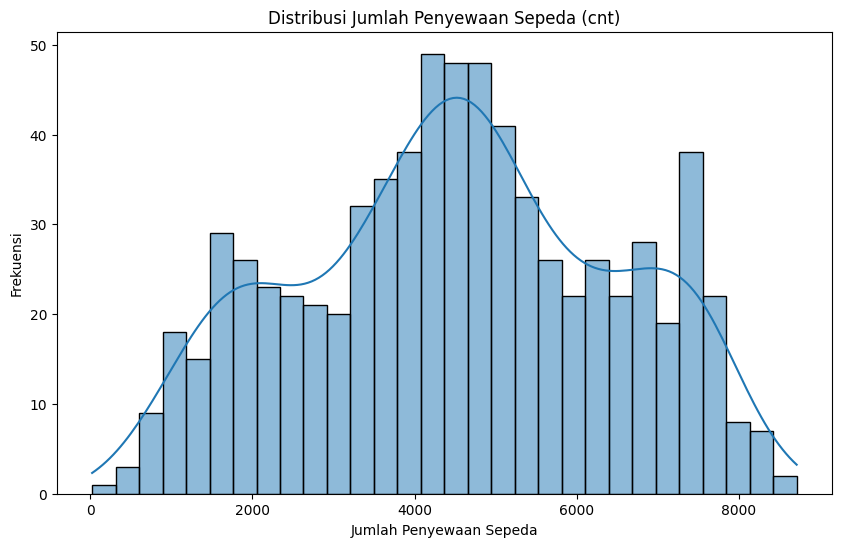

In [120]:
# Plot distribusi variabel cnt
plt.figure(figsize=(10, 6))
sns.histplot(df_day['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda (cnt)')
plt.xlabel('Jumlah Penyewaan Sepeda')
plt.ylabel('Frekuensi')
plt.show()

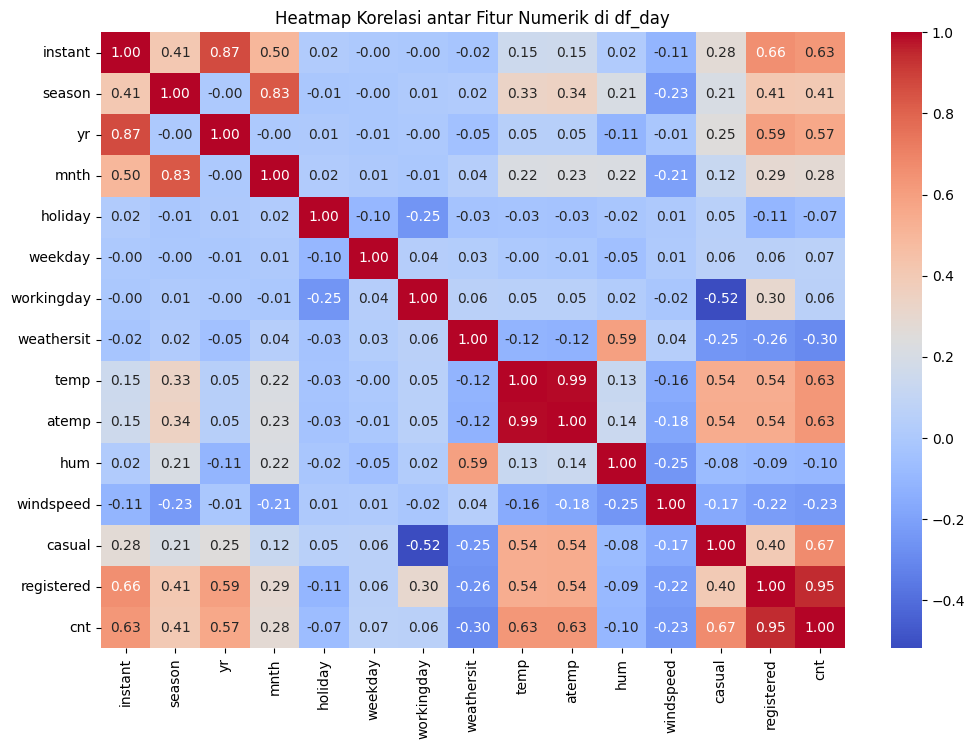

In [114]:
df_day_numeric = df_day.select_dtypes(include=[float, int])

# Menghitung matriks korelasi
corr_matrix = df_day_numeric.corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi antar Fitur Numerik di df_day')
plt.show()

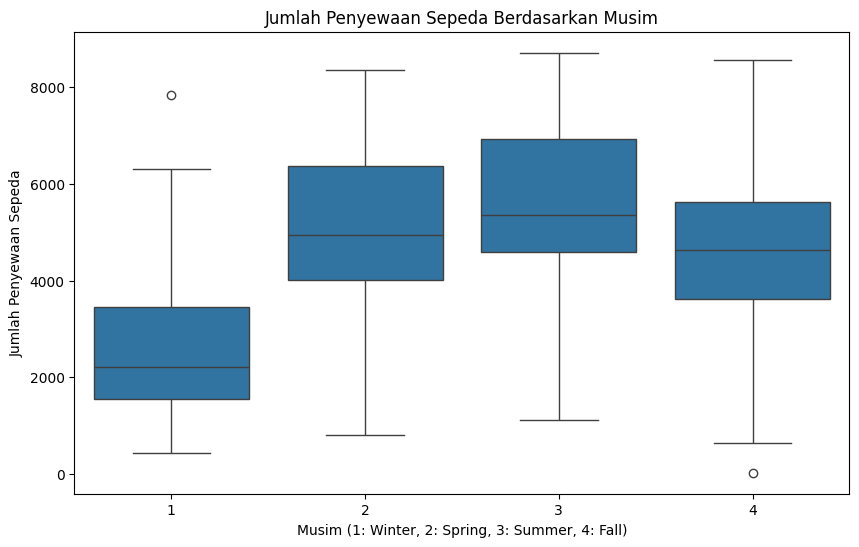

In [122]:
# Boxplot untuk melihat distribusi jumlah penyewaan sepeda berdasarkan musim
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=df_day)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim (1: Winter, 2: Spring, 3: Summer, 4: Fall)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

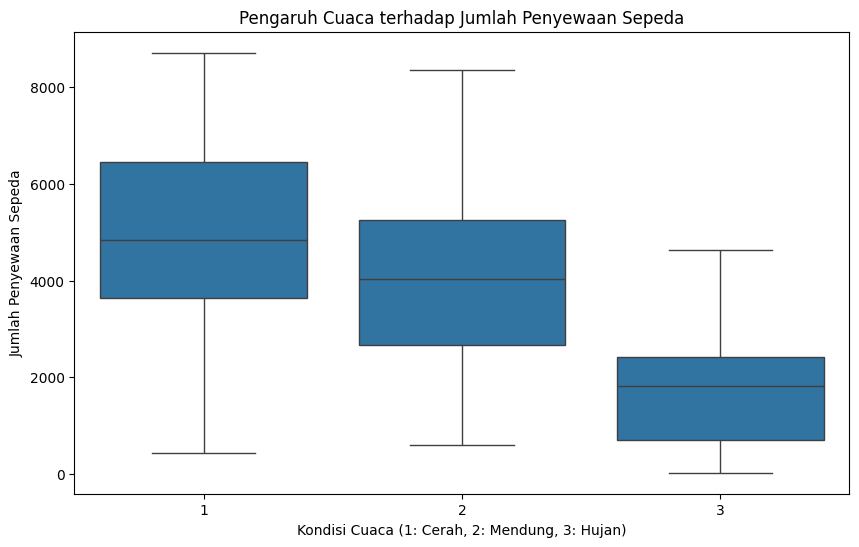

In [123]:
# Boxplot untuk melihat pengaruh cuaca terhadap penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=df_day)
plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca (1: Cerah, 2: Mendung, 3: Hujan)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

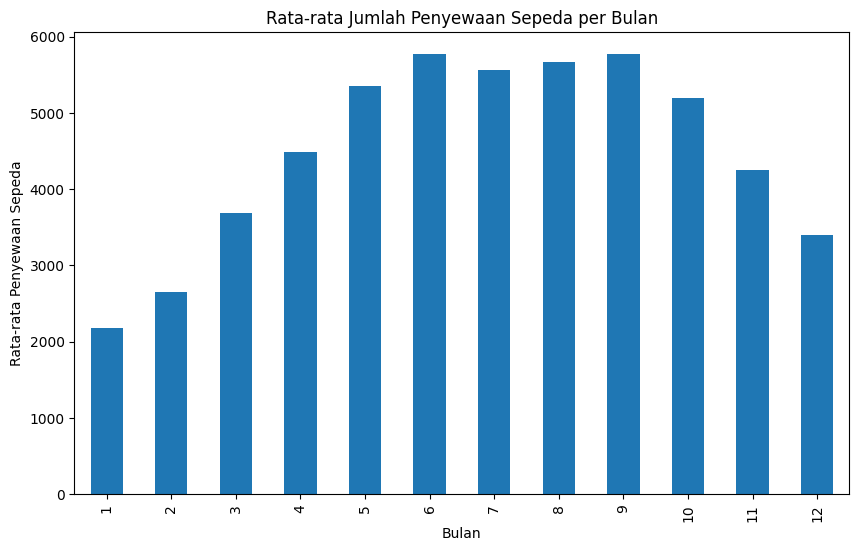

In [124]:
# Mengelompokkan jumlah penyewaan sepeda berdasarkan bulan
df_day.groupby('mnth')['cnt'].mean().plot(kind='bar', figsize=(10, 6))
plt.title('Rata-rata Jumlah Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.show()

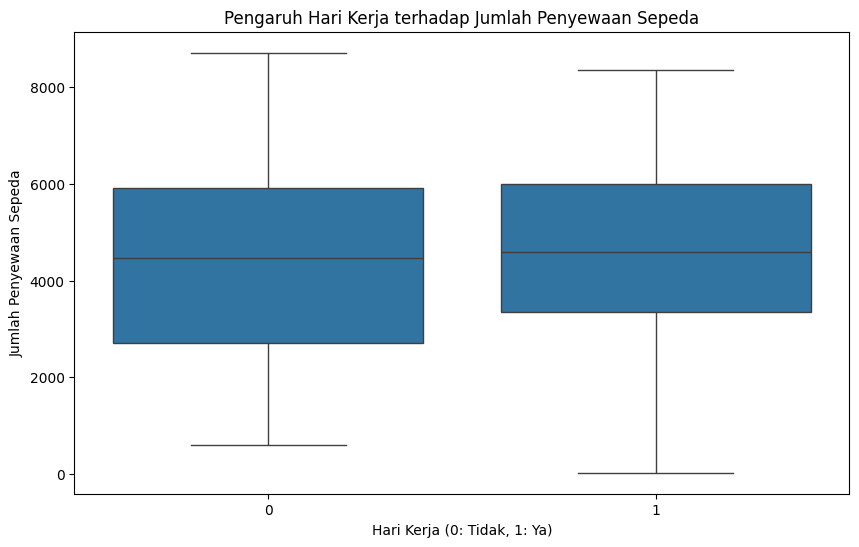

In [125]:
# Boxplot untuk melihat pengaruh hari kerja dan hari libur terhadap penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=df_day)
plt.title('Pengaruh Hari Kerja terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Hari Kerja (0: Tidak, 1: Ya)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

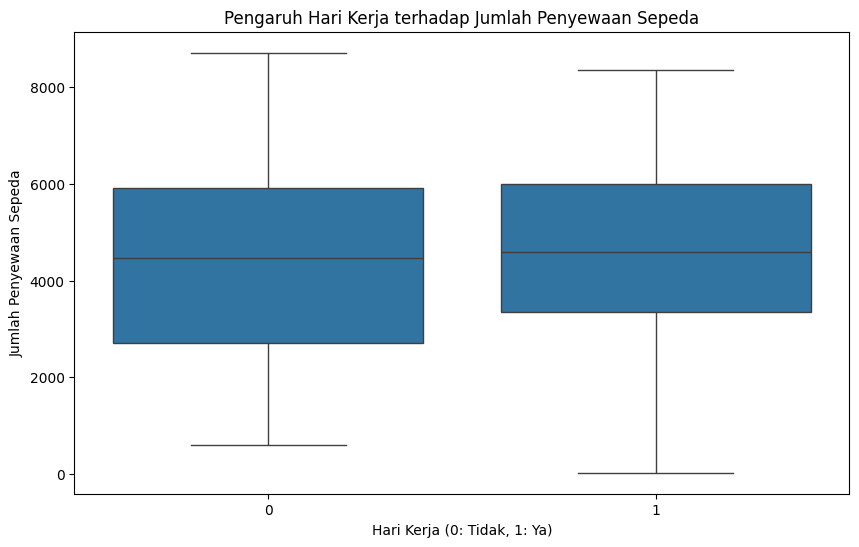

In [119]:
# Boxplot untuk melihat pengaruh hari kerja dan hari libur terhadap penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=df_day)
plt.title('Pengaruh Hari Kerja terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Hari Kerja (0: Tidak, 1: Ya)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

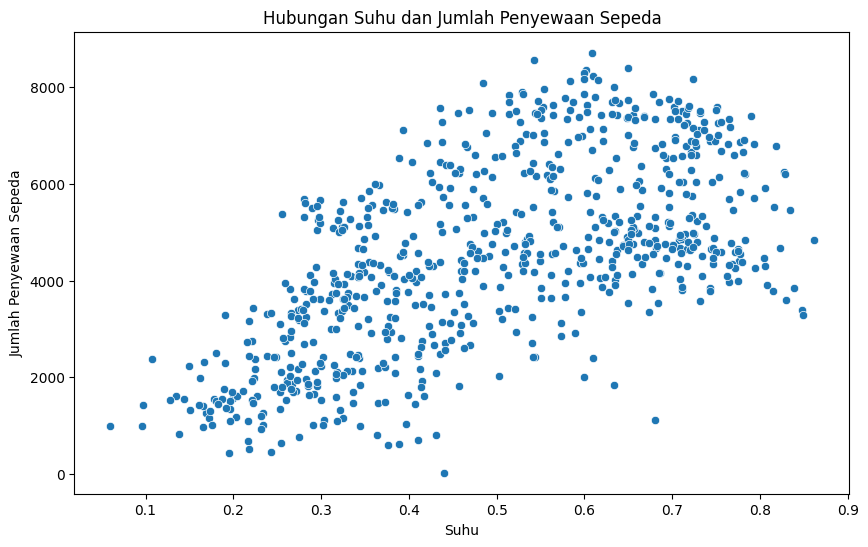

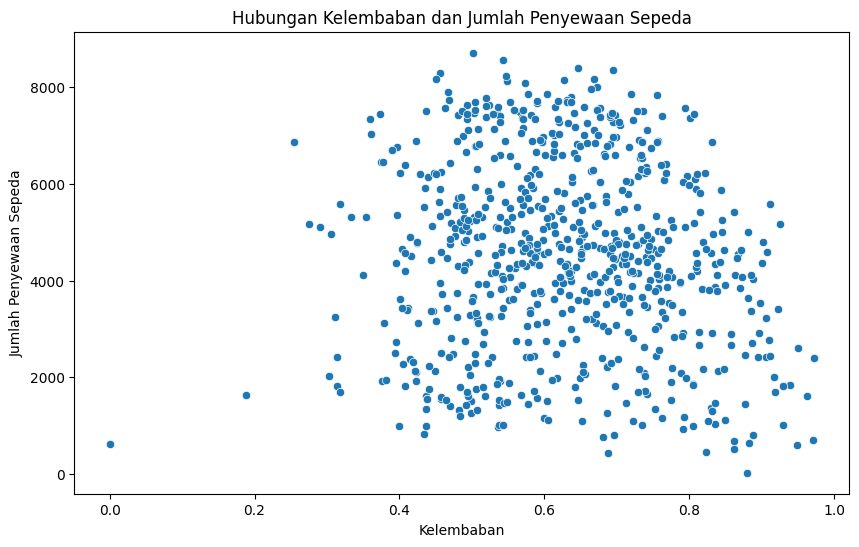

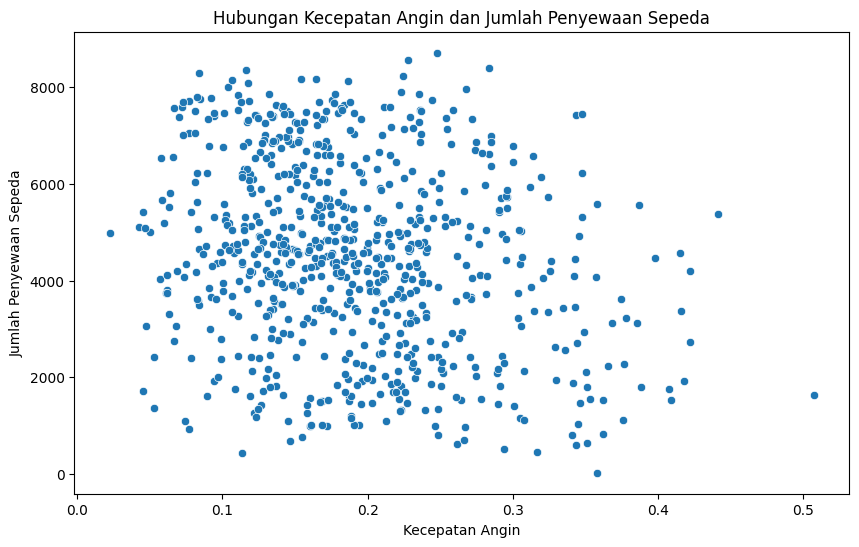

In [126]:
# Scatterplot untuk melihat hubungan antara suhu dan jumlah penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df_day)
plt.title('Hubungan Suhu dan Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Scatterplot untuk kelembaban
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=df_day)
plt.title('Hubungan Kelembaban dan Jumlah Penyewaan Sepeda')
plt.xlabel('Kelembaban')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Scatterplot untuk kecepatan angin
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='cnt', data=df_day)
plt.title('Hubungan Kecepatan Angin dan Jumlah Penyewaan Sepeda')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

- ### df_hour

In [129]:
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


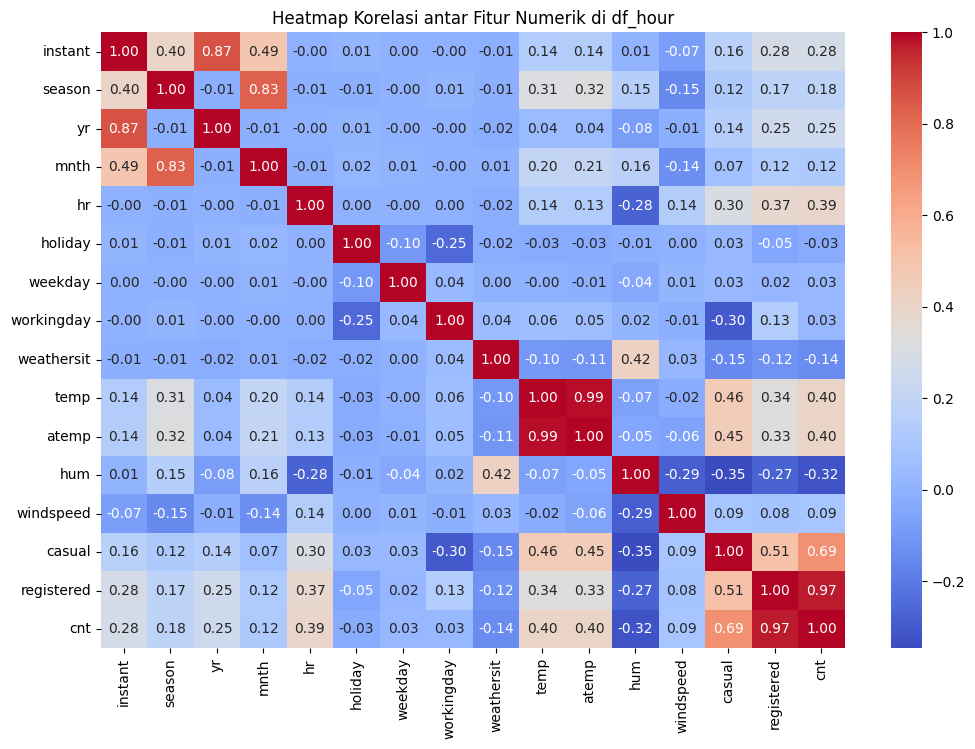

In [135]:
df_hour_numeric = df_hour.select_dtypes(include=[float, int])

# Menghitung matriks korelasi
corr_matrix = df_hour_numeric.corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi antar Fitur Numerik di df_hour')
plt.show()

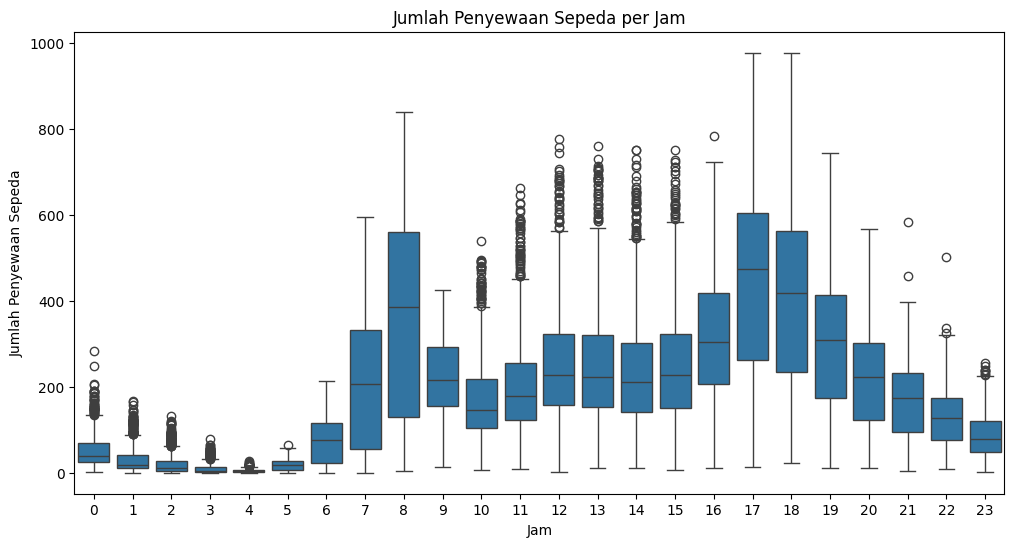

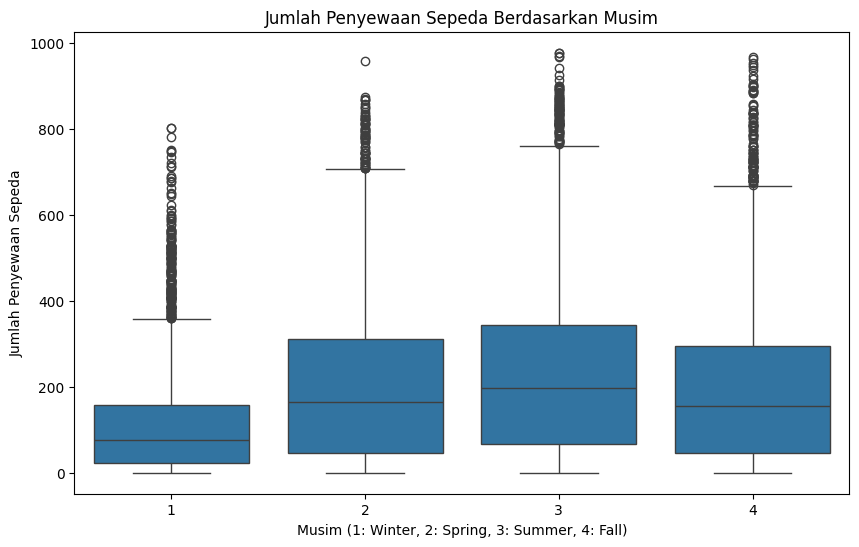

In [136]:
# Boxplot untuk melihat distribusi jumlah penyewaan sepeda berdasarkan jam
plt.figure(figsize=(12, 6))
sns.boxplot(x='hr', y='cnt', data=df_hour)
plt.title('Jumlah Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Boxplot untuk melihat distribusi jumlah penyewaan sepeda berdasarkan musim
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=df_hour)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim (1: Winter, 2: Spring, 3: Summer, 4: Fall)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

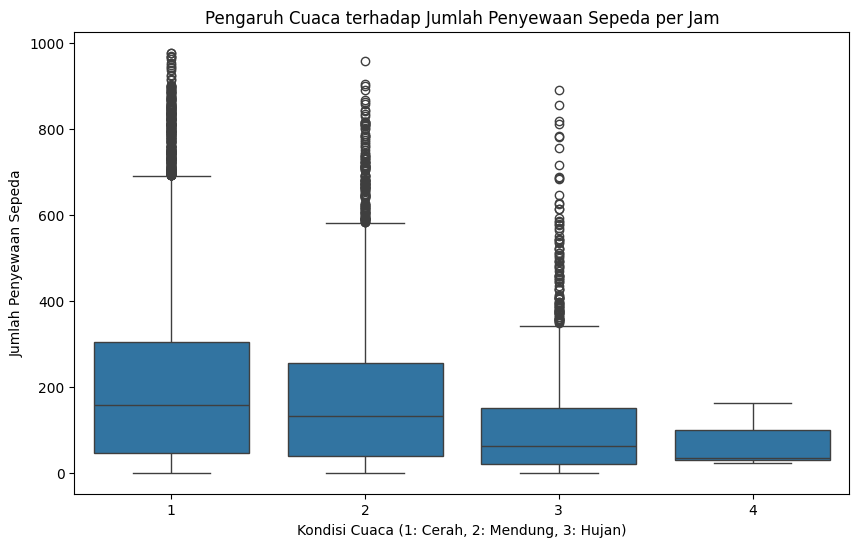

In [137]:
# Boxplot untuk melihat pengaruh cuaca terhadap penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=df_hour)
plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda per Jam')
plt.xlabel('Kondisi Cuaca (1: Cerah, 2: Mendung, 3: Hujan)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

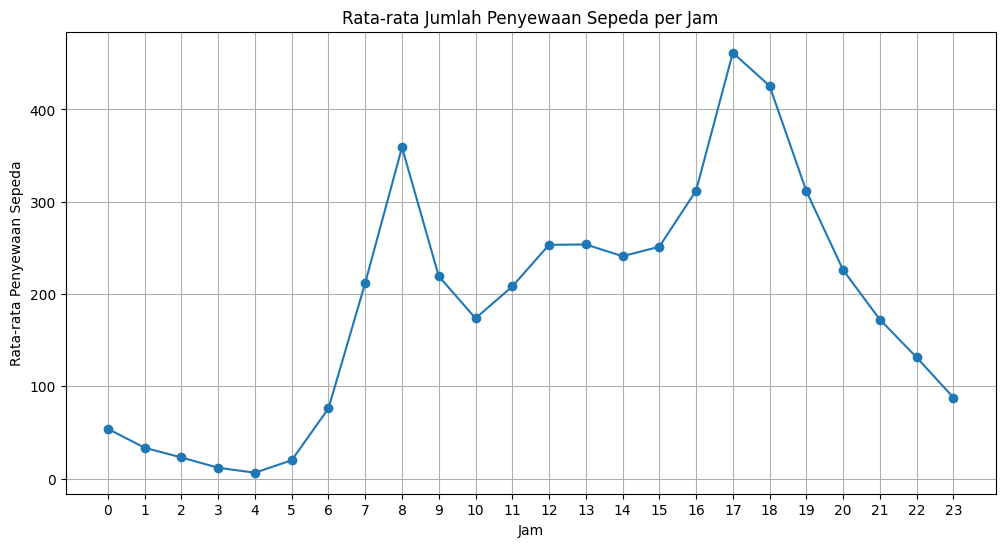

In [138]:
# Mengelompokkan jumlah penyewaan sepeda berdasarkan jam
hourly_usage = df_hour.groupby('hr')['cnt'].mean()

# Visualisasi tren penggunaan sepeda
plt.figure(figsize=(12, 6))
hourly_usage.plot(kind='line', marker='o')
plt.title('Rata-rata Jumlah Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

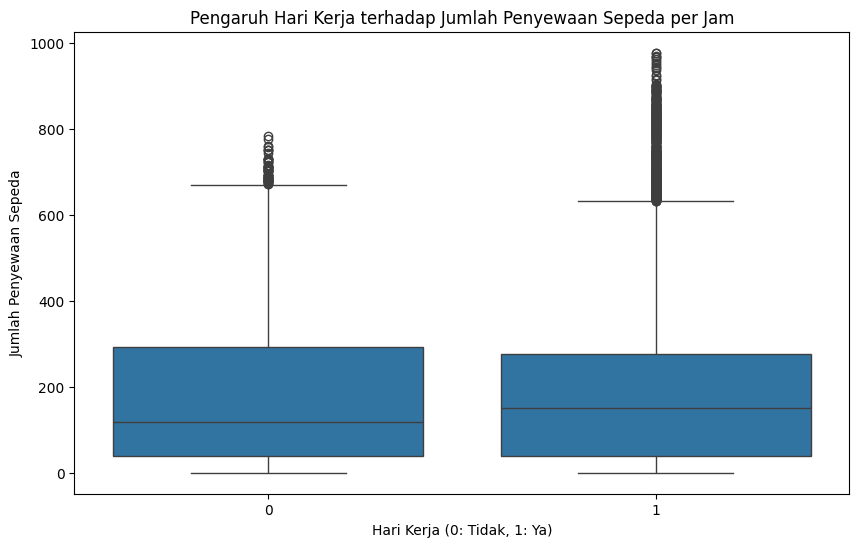

In [139]:
# Boxplot untuk melihat pengaruh hari kerja dan hari libur terhadap penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=df_hour)
plt.title('Pengaruh Hari Kerja terhadap Jumlah Penyewaan Sepeda per Jam')
plt.xlabel('Hari Kerja (0: Tidak, 1: Ya)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

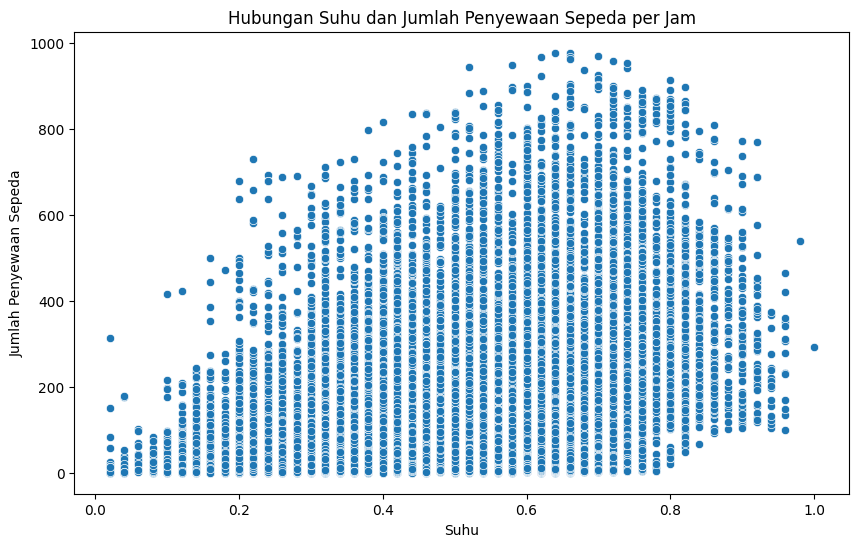

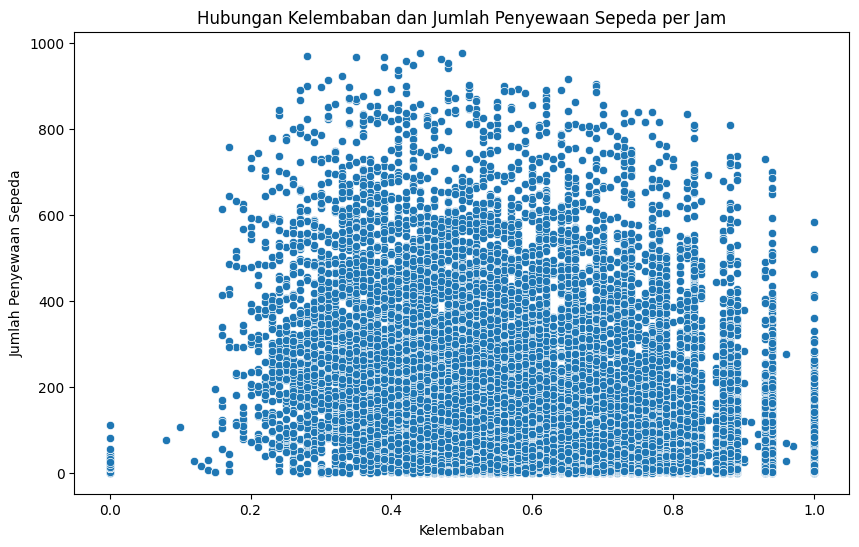

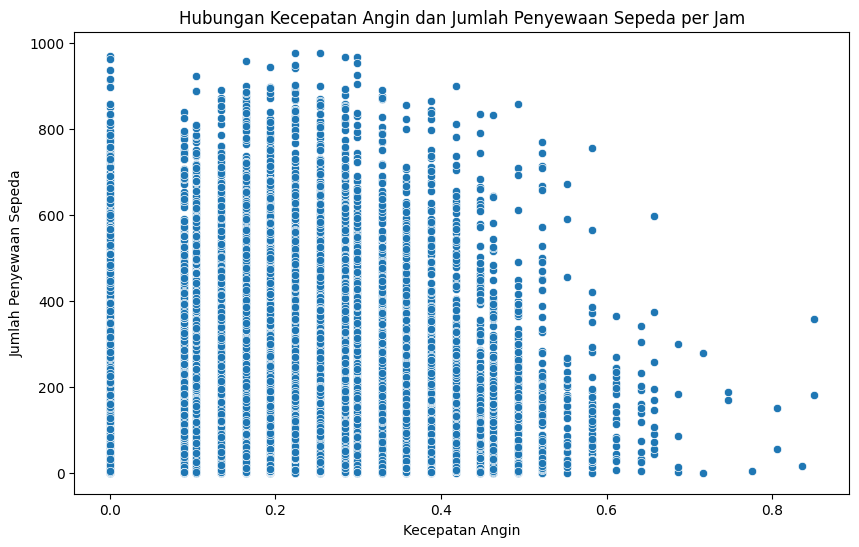

In [140]:
# Scatterplot untuk melihat hubungan antara suhu dan jumlah penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df_hour)
plt.title('Hubungan Suhu dan Jumlah Penyewaan Sepeda per Jam')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Scatterplot untuk kelembaban
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=df_hour)
plt.title('Hubungan Kelembaban dan Jumlah Penyewaan Sepeda per Jam')
plt.xlabel('Kelembaban')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Scatterplot untuk kecepatan angin
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='cnt', data=df_hour)
plt.title('Hubungan Kecepatan Angin dan Jumlah Penyewaan Sepeda per Jam')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

**Insight:**
- Penyewaan sepeda meningkat seiring dengan meningkatnya suhu, menunjukkan preferensi orang untuk bersepeda dalam cuaca yang lebih hangat.
- Tingkat kelembaban yang tinggi cenderung mengurangi jumlah penyewaan, meskipun pengaruhnya tidak terlalu kuat.
- Kecepatan angin tidak memiliki pengaruh signifikan terhadap penyewaan sepeda; pengguna tetap menyewa meskipun ada angin kencang.
- Cuaca yang baik (cerah atau mendung ringan) berkontribusi pada peningkatan penyewaan, sementara cuaca buruk (hujan deras atau badai) menyebabkan penurunan yang signifikan.
- Musim panas adalah waktu dengan jumlah penyewaan tertinggi, dengan puncak aktivitas di pagi dan sore hari. Sebaliknya, penggunaan sepeda rendah terjadi pada musim dingin.
- Penyewaan sepeda meningkat pada hari kerja dibandingkan hari libur, menandakan bahwa banyak pengguna menggunakan sepeda untuk perjalanan ke tempat kerja.
- Penggunaan sepeda meningkat pada jam sibuk (pagi dan sore) di semua musim, dengan musim panas menunjukkan angka penyewaan tertinggi.
- Hari libur meningkatkan penyewaan sepeda oleh pengguna casual, yang menunjukkan kecenderungan untuk bersepeda saat tidak ada kewajiban kerja.
- Pengguna terdaftar cenderung menyewa lebih banyak pada hari kerja, mencerminkan kebutuhan rutin untuk pergi bekerja atau bersekolah.
- Terdapat dua puncak utama dalam penggunaan sepeda, yaitu di pagi dan sore hari. Kondisi cuaca yang baik berperan penting dalam meningkatkan penyewaan, sedangkan hujan deras menyebabkan penurunan drastis dalam aktivitas penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana Pengaruh Cuaca (Weathersit, Temp, Humidity, dan Windspeed) Terhadap Jumlah Penyewaan Sepeda?

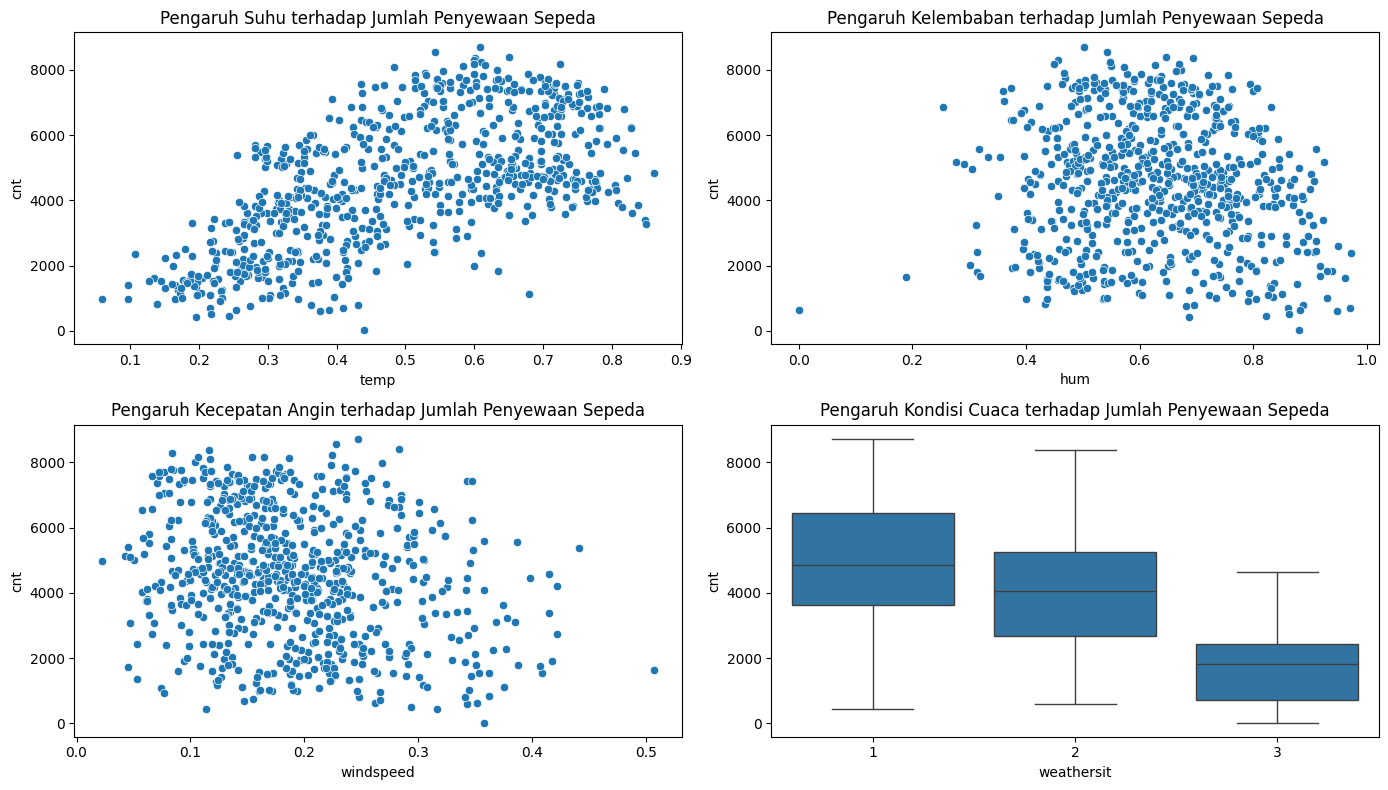

In [150]:
# Visualisasi pengaruh cuaca terhadap jumlah penyewaan sepeda
plt.figure(figsize=(14, 8))

# Suhu vs Jumlah Penyewaan
plt.subplot(2, 2, 1)
sns.scatterplot(x='temp', y='cnt', data=df_day)
plt.title('Pengaruh Suhu terhadap Jumlah Penyewaan Sepeda')

# Kelembaban vs Jumlah Penyewaan
plt.subplot(2, 2, 2)
sns.scatterplot(x='hum', y='cnt', data=df_day)
plt.title('Pengaruh Kelembaban terhadap Jumlah Penyewaan Sepeda')

# Kecepatan Angin vs Jumlah Penyewaan
plt.subplot(2, 2, 3)
sns.scatterplot(x='windspeed', y='cnt', data=df_day)
plt.title('Pengaruh Kecepatan Angin terhadap Jumlah Penyewaan Sepeda')

# Kondisi Cuaca vs Jumlah Penyewaan
plt.subplot(2, 2, 4)
sns.boxplot(x='weathersit', y='cnt', data=df_day)
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda')

plt.tight_layout()
plt.show()

### Pertanyaan 2:
Kapan Periode Waktu Puncak Penggunaan Sepeda Berdasarkan Musim (Season) dan Hari Kerja (Working Day)?

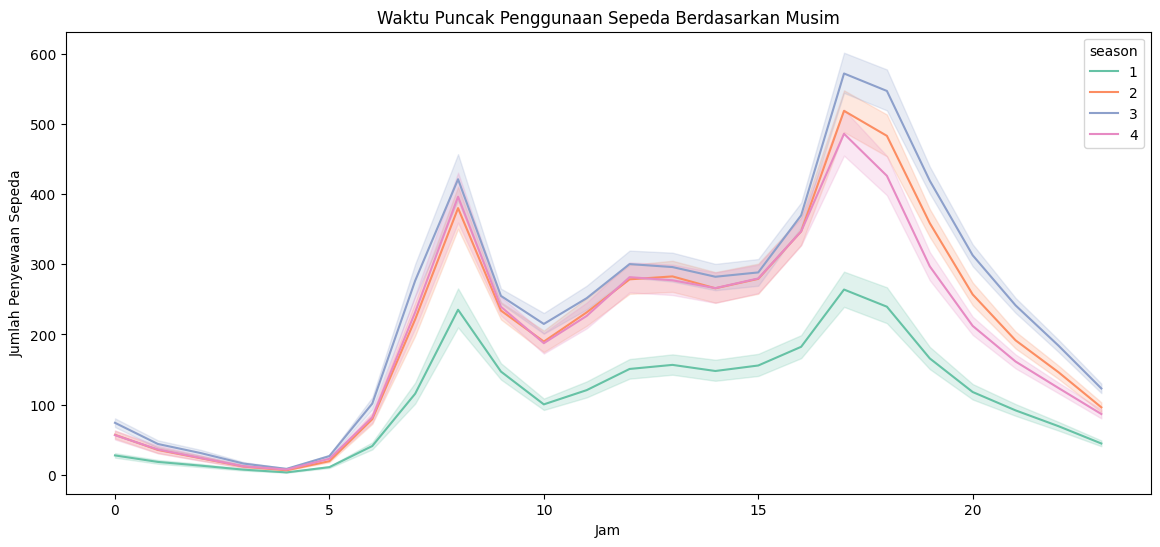

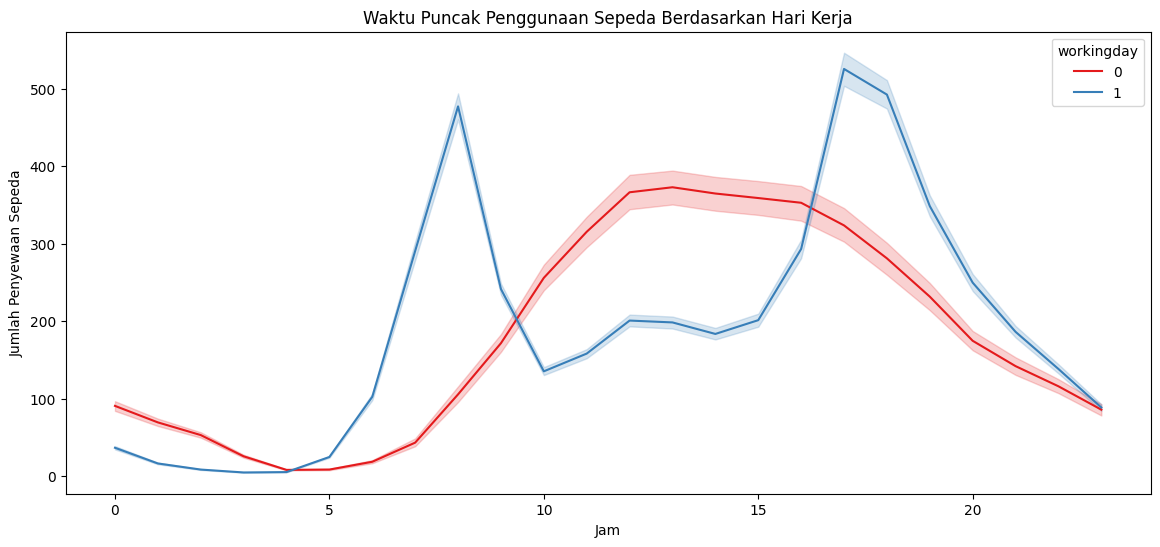

In [151]:
# Mengelompokkan data berdasarkan jam dan musim
plt.figure(figsize=(14, 6))
sns.lineplot(x='hr', y='cnt', hue='season', data=df_hour, palette='Set2')
plt.title('Waktu Puncak Penggunaan Sepeda Berdasarkan Musim')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Mengelompokkan data berdasarkan jam dan hari kerja
plt.figure(figsize=(14, 6))
sns.lineplot(x='hr', y='cnt', hue='workingday', data=df_hour, palette='Set1')
plt.title('Waktu Puncak Penggunaan Sepeda Berdasarkan Hari Kerja')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

### Pertanyaan 3:
Apakah Ada Perbedaan Penggunaan Sepeda Berdasarkan Musim (Season) dan Jam dalam Sehari (Hour)?

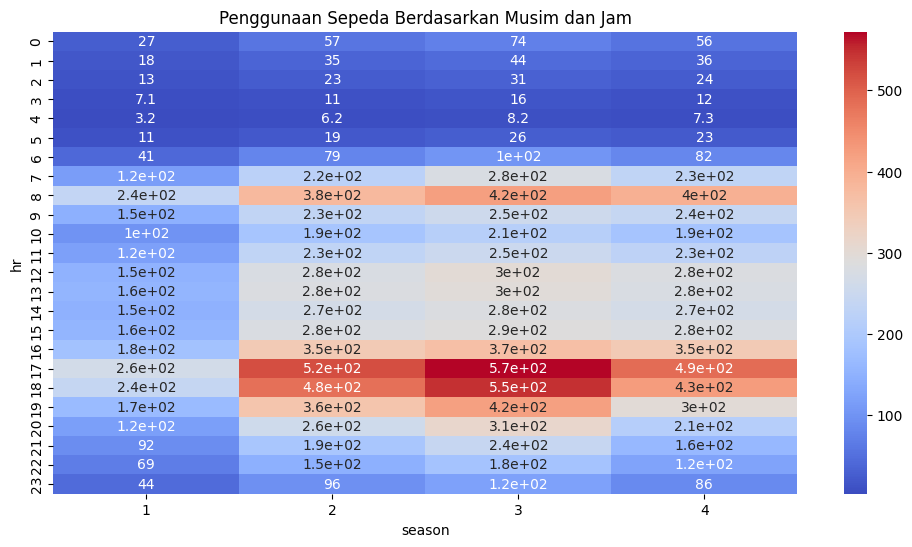

In [153]:
# Heatmap perbedaan penggunaan sepeda berdasarkan musim dan jam
plt.figure(figsize=(12, 6))
season_hour_pivot = df_hour.pivot_table(values='cnt', index='hr', columns='season', aggfunc='mean')
sns.heatmap(season_hour_pivot, cmap='coolwarm', annot=True)
plt.title('Penggunaan Sepeda Berdasarkan Musim dan Jam')
plt.show()

### Pertanyaan 4:
Bagaimana Pengaruh Hari Libur (Holiday) dan Hari Kerja (Workingday) Terhadap Jumlah Pengguna Casual dan Registered?

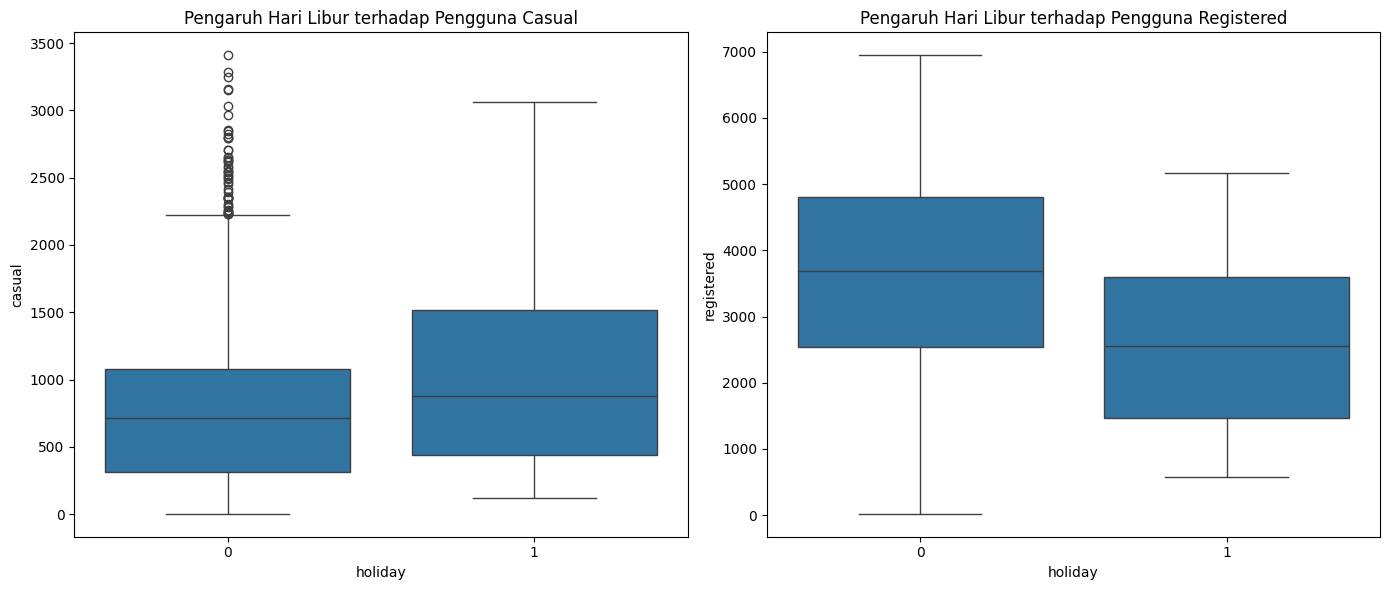

In [154]:
# Pengguna casual dan registered berdasarkan hari libur
plt.figure(figsize=(14, 6))

# Pengguna casual
plt.subplot(1, 2, 1)
sns.boxplot(x='holiday', y='casual', data=df_day)
plt.title('Pengaruh Hari Libur terhadap Pengguna Casual')

# Pengguna registered
plt.subplot(1, 2, 2)
sns.boxplot(x='holiday', y='registered', data=df_day)
plt.title('Pengaruh Hari Libur terhadap Pengguna Registered')

plt.tight_layout()
plt.show()

### Pertanyaan 5:
Bagaimana Kombinasi dari Cuaca Buruk (Weathersit) dan Waktu Tertentu dalam Sehari (Hour) Mempengaruhi Penurunan Penggunaan Sepeda?

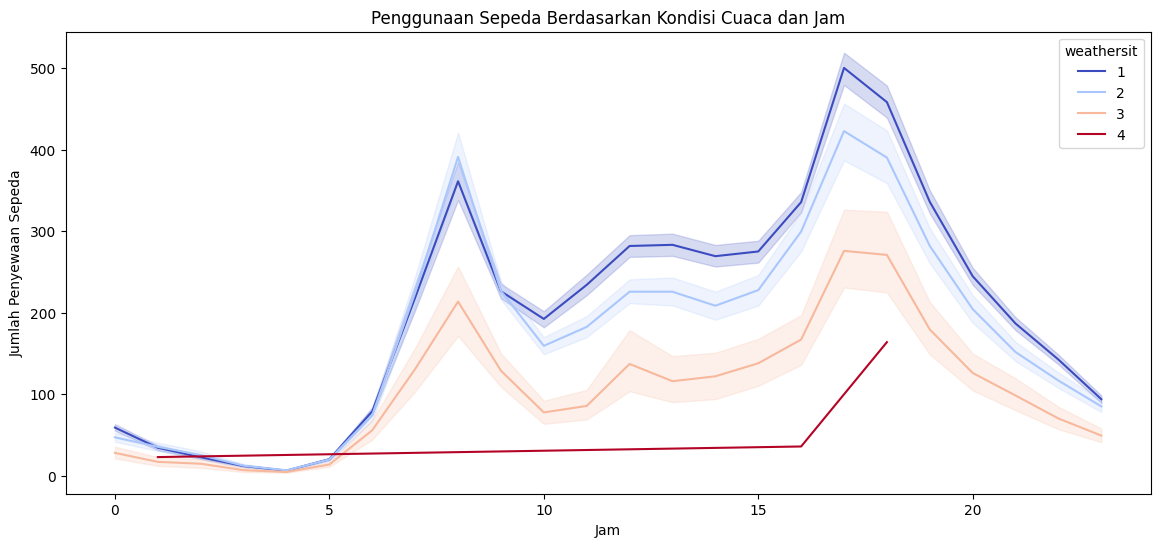

In [155]:
# Mengelompokkan penggunaan sepeda berdasarkan kondisi cuaca dan jam
plt.figure(figsize=(14, 6))
sns.lineplot(x='hr', y='cnt', hue='weathersit', data=df_hour, palette='coolwarm')
plt.title('Penggunaan Sepeda Berdasarkan Kondisi Cuaca dan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

**Insight:**
- Suhu yang lebih hangat meningkatkan jumlah penyewaan sepeda.
- Kelembaban tinggi cenderung mengurangi penggunaan sepeda.
- Kecepatan angin tidak terlalu berpengaruh.
- Kondisi cuaca yang cerah atau mendung ringan mendorong penggunaan sepeda lebih banyak dibandingkan cuaca buruk.
- Penggunaan sepeda tertinggi terjadi di musim panas, terutama pada jam sibuk pagi dan sore.
- Pada hari kerja, sepeda lebih banyak digunakan di pagi dan sore, sedangkan pada hari libur, penggunaan merata sepanjang hari.
- Jam sibuk (8-9 pagi dan 5-6 sore) konsisten di semua musim, dengan puncak tertinggi di musim panas.
- Pengguna casual lebih sering bersepeda pada hari libur, sedangkan pengguna registered lebih aktif pada hari kerja.
- Cuaca cerah mendorong penggunaan sepeda tertinggi.
- Hujan atau cuaca buruk menurunkan penggunaan sepeda secara drastis, terutama di jam sibuk.

## Analisis Lanjutan (Opsional)

### Interaksi antar variabel

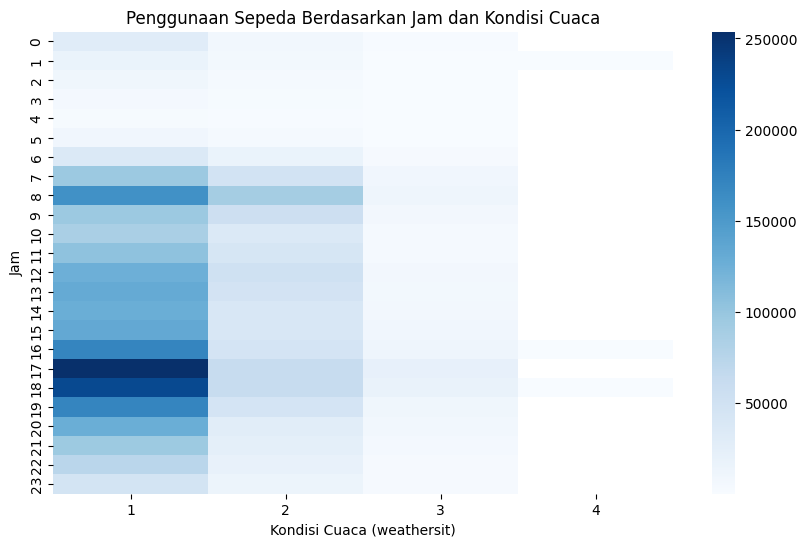

In [165]:
# heatmap untuk interaksi weathersit dan jam
heatmap_data = df_hour.pivot_table(values='cnt', index='hr', columns='weathersit', aggfunc='sum')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='Blues')
plt.title('Penggunaan Sepeda Berdasarkan Jam dan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca (weathersit)')
plt.ylabel('Jam')
plt.show()

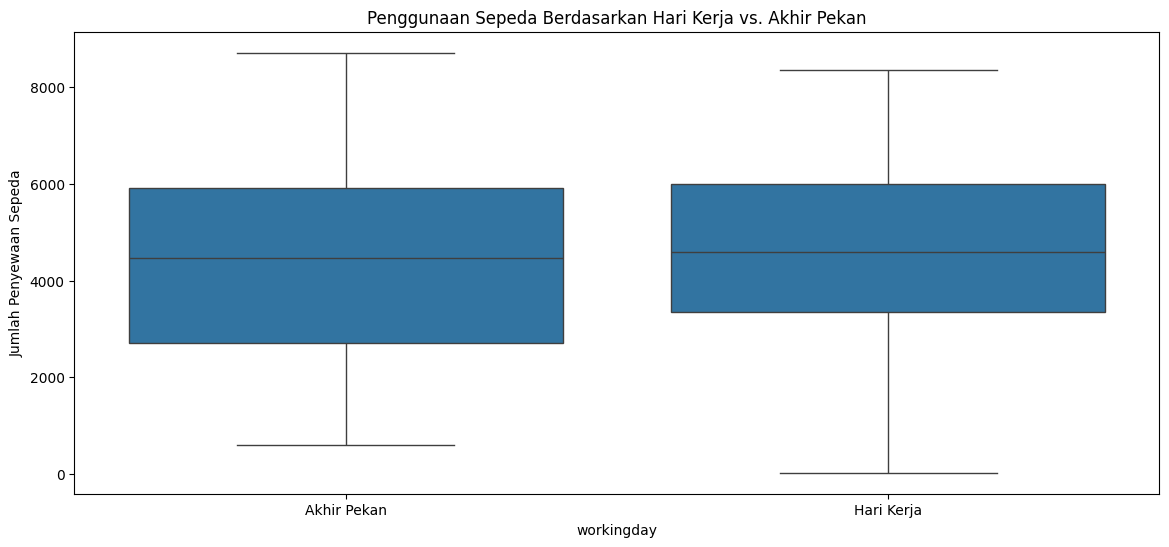

In [166]:
# boxplot untuk pengguna casual dan registered berdasarkan workingday
plt.figure(figsize=(14, 6))
sns.boxplot(x='workingday', y='cnt', data=df_day)
plt.title('Penggunaan Sepeda Berdasarkan Hari Kerja vs. Akhir Pekan')
plt.xticks(ticks=[0, 1], labels=['Akhir Pekan', 'Hari Kerja'])
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

### Model Prediksi

In [170]:
# Menyiapkan data untuk model regresi
X = df_hour[['temp', 'hum', 'windspeed', 'weathersit', 'hr']]
X = sm.add_constant(X)  # Menambahkan intercept
y = df_hour['cnt']

# Model regresi
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     1674.
Date:                Wed, 02 Oct 2024   Prob (F-statistic):               0.00
Time:                        10:42:32   Log-Likelihood:            -1.1162e+05
No. Observations:               17379   AIC:                         2.233e+05
Df Residuals:                   17373   BIC:                         2.233e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.2744      6.388     11.000      0.0

### Segmentasi Pengguna

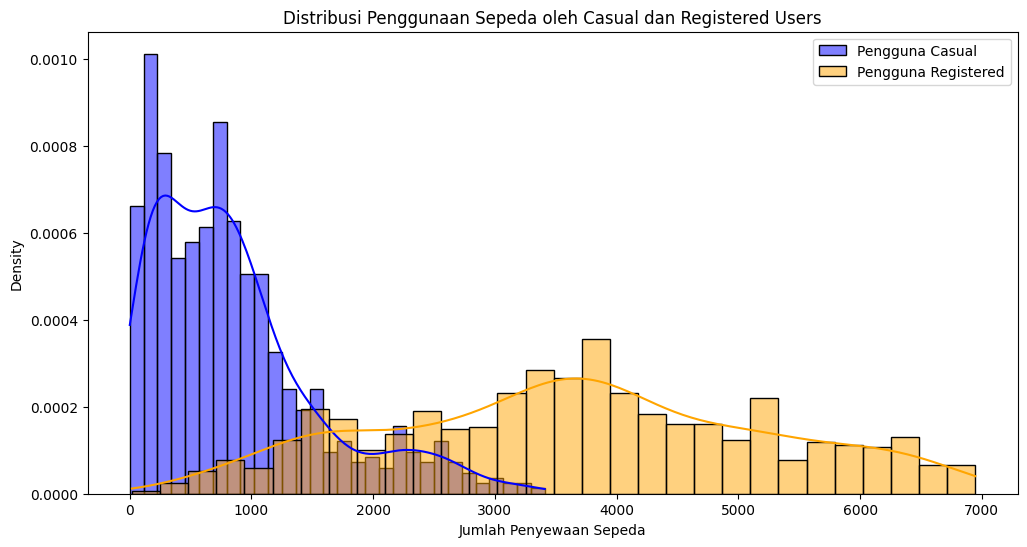

In [182]:
#analisis pengguna casual dan registered
if 'casual' in df_day.columns and 'registered' in df_day.columns:
    # Menghitung total penyewaan untuk casual dan registered
    casual_usage = df_day['casual']
    registered_usage = df_day['registered']

    plt.figure(figsize=(12, 6))
    sns.histplot(casual_usage, color='blue', label='Pengguna Casual', kde=True, stat='density', bins=30)
    sns.histplot(registered_usage, color='orange', label='Pengguna Registered', kde=True, stat='density', bins=30)
    
    plt.title('Distribusi Penggunaan Sepeda oleh Casual dan Registered Users')
    plt.xlabel('Jumlah Penyewaan Sepeda')
    plt.legend()
    plt.show()
else:
    print("Kolom 'casual' atau 'registered' tidak ditemukan dalam DataFrame df_day.")

### Evaluasi Model

In [190]:
# evaluasi model regresi

from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(X)

rmse = np.sqrt(mean_squared_error(y, predictions))

r2 = r2_score(y, predictions)

# menampilkan hasil evaluasi
print(f'RMSE: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')


RMSE: 149.01
R-squared: 0.33


## Conclusion

**Conclusion Pertanyaan 1:**

Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda menunjukkan bahwa suhu memiliki korelasi positif dengan jumlah penyewaan sepeda, di mana penyewaan meningkat pada suhu yang lebih hangat. Sebaliknya, kelembaban dan kecepatan angin tidak memiliki pengaruh signifikan, sementara cuaca buruk cenderung mengurangi penyewaan.

**Conclusion Pertanyaan 2:**

Waktu Puncak Penggunaan Sepeda Berdasarkan Musim dan Hari Kerja terjadi pada musim panas dan saat jam sibuk (pagi dan sore). Hari kerja cenderung memiliki penggunaan lebih tinggi pada jam-jam tersebut, sedangkan hari libur menunjukkan pola penggunaan yang lebih merata sepanjang hari.

**Conclusion Pertanyaan 3:**

Penggunaan Sepeda Berdasarkan Musim dan Jam menunjukkan bahwa puncak penggunaan sepeda terjadi di musim panas dan saat jam sibuk, terutama pada sore hari. Musim panas memiliki tingkat penyewaan yang lebih tinggi dibandingkan musim lainnya.

**Conclusion Pertanyaan 4:**

Pengaruh Hari Libur Terhadap Pengguna Casual dan Registered menunjukkan bahwa pengguna casual lebih aktif saat hari libur, sedangkan pengguna registered lebih banyak menggunakan sepeda pada hari kerja, kemungkinan besar untuk aktivitas sehari-hari seperti pergi ke tempat kerja.

**Conclusion Pertanyaan 5:**

Penggunaan Sepeda Berdasarkan Kondisi Cuaca dan Jam memperlihatkan bahwa cuaca cerah atau mendung ringan (weathersit 1) menghasilkan penyewaan sepeda tertinggi, sementara cuaca buruk (weathersit 3 dan 4) secara signifikan menurunkan penggunaan sepeda, terutama pada jam-jam sibuk.


### Kesimpulan umum
- Proses pembersihan data meliputi penanganan missing values, duplicate data, dan outlier.
- Terdapat korelasi positif antara suhu dan jumlah penyewaan sepeda, semakin tinggi suhu, semakin banyak penyewaan sepeda.
- Kelembaban dan kecepatan angin tidak memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda.
- Kondisi cuaca cerah atau berawan ringan menghasilkan jumlah penyewaan sepeda yang lebih tinggi dibandingkan cuaca buruk.
- Penggunaan sepeda mencapai puncaknya pada jam sibuk pagi (sekitar jam 8-9) dan sore (sekitar jam 5-6).
- Pada musim panas, penggunaan sepeda lebih tinggi dibandingkan musim dingin, terutama selama jam sibuk.
- Pengguna casual cenderung menyewa sepeda lebih banyak pada hari libur, sedangkan pengguna registered lebih banyak pada hari kerja.
- Visualisasi menunjukkan pola yang konsisten antara musim, waktu, dan kondisi cuaca terhadap penggunaan sepeda.
- Model regresi sederhana memberikan hasil yang kurang kuat dengan RMSE sebesar 149.01 dan R-squared 0.33.
- Wawasan dari analisis ini dapat digunakan untuk memprediksi jumlah penyewaan sepeda berdasarkan kondisi cuaca dan waktu tertentu.
- Ada potensi untuk meningkatkan akurasi prediksi penggunaan sepeda dengan menggunakan model pemodelan yang lebih kompleks.

In [192]:
# Simpan dataframe yang telah dibersihkan ke dalam file CSV
df_hour.to_csv('hour_cleaned.csv', index=False)  # Menyimpan df_hour yang telah dibersihkan
df_day.to_csv('day_cleaned.csv', index=False)    # Menyimpan df_day yang telah dibersihkan

print("Berkas cleaned data berhasil disimpan!")

Berkas cleaned data berhasil disimpan!
